# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.118818e+01     7.798777e+00
 * time: 0.0022869110107421875
     1     2.933933e+01     4.891224e+00
 * time: 0.009610891342163086
     2     2.136363e+01     4.848136e+00
 * time: 0.018110990524291992
     3     1.532933e+01     5.703557e+00
 * time: 0.026103973388671875
     4     1.187792e+01     2.402140e+00
 * time: 0.03393697738647461
     5     9.798208e+00     9.591970e-01
 * time: 0.041916847229003906
     6     9.311930e+00     1.576858e+00
 * time: 0.04840898513793945
     7     8.882483e+00     1.124709e+00
 * time: 0.05580282211303711
     8     8.476480e+00     9.966525e-01
 * time: 0.06284785270690918
     9     8.227529e+00     6.492844e-01
 * time: 0.06981396675109863
    10     8.102573e+00     5.254895e-01
 * time: 0.11196088790893555
    11     7.991118e+00     5.036482e-01
 * time: 0.11813187599182129
    12     7.987465e+00     1.182886e+00
 * time: 0.12222599983215332
    13     7.943756e+00     6.347658e-01
 *

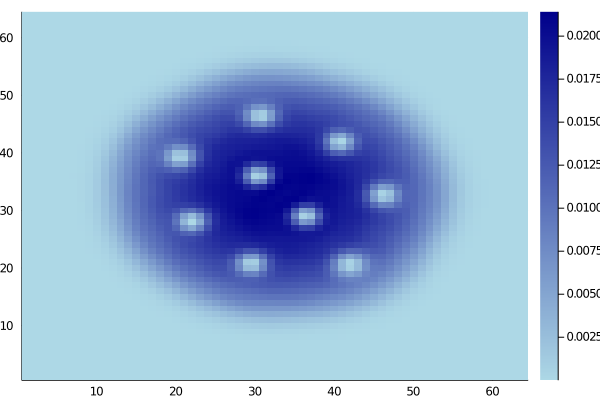

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)